In [1]:
import numpy as np
import pandas as pd
from obspy import read
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import os
from obspy.signal.invsim import cosine_taper
from obspy.signal.filter import highpass
from obspy.signal.trigger import classic_sta_lta, plot_trigger, trigger_onset
from filter import filter

In [2]:
data_directory = './space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/'

cat_directory = './space_apps_2024_seismic_detection/data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)

In [3]:
# Funny

In [4]:
# How long should the short-term and long-term window be, in seconds?
sta_len = 5000
lta_len = 40000

# Play around with the on and off triggers, based on values in the characteristic function
thr_on = 2.3
thr_off = 1.5

Longest sequence:  4869 from 486979 to 504841
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572410    0.0
572411    0.0
572412    0.0
572413    0.0
572414    0.0
Name: longest_consecutive_velocity(m/s), Length: 572415, dtype: float64


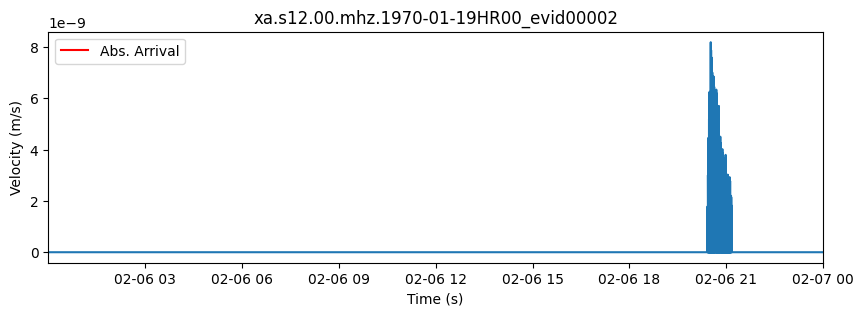

Longest sequence:  4551 from 85375 to 104316
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572406    0.0
572407    0.0
572408    0.0
572409    0.0
572410    0.0
Name: longest_consecutive_velocity(m/s), Length: 572411, dtype: float64


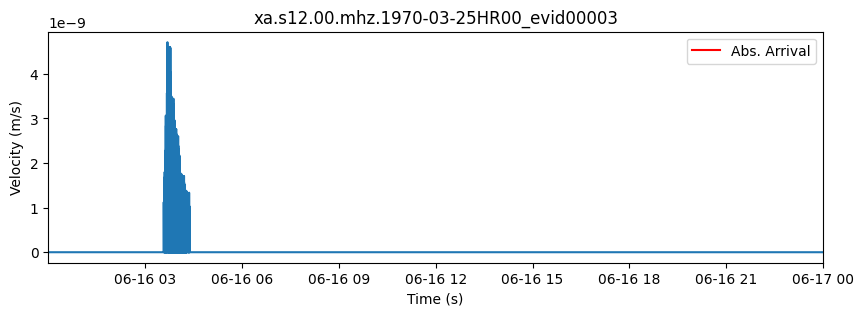

Longest sequence:  4428 from 484651 to 503892
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572406    0.0
572407    0.0
572408    0.0
572409    0.0
572410    0.0
Name: longest_consecutive_velocity(m/s), Length: 572411, dtype: float64


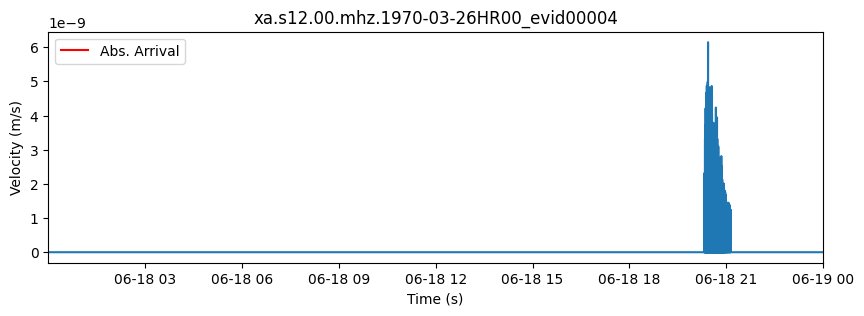

Longest sequence:  5325 from 30984 to 52391
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572410    0.0
572411    0.0
572412    0.0
572413    0.0
572414    0.0
Name: longest_consecutive_velocity(m/s), Length: 572415, dtype: float64


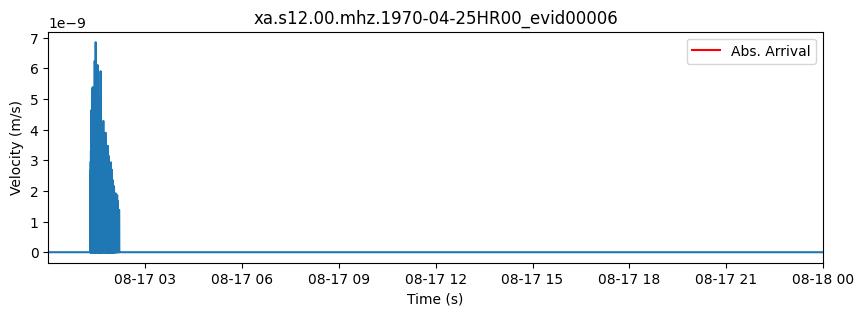

Longest sequence:  2900 from 304672 to 353064
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572406    0.0
572407    0.0
572408    0.0
572409    0.0
572410    0.0
Name: longest_consecutive_velocity(m/s), Length: 572411, dtype: float64


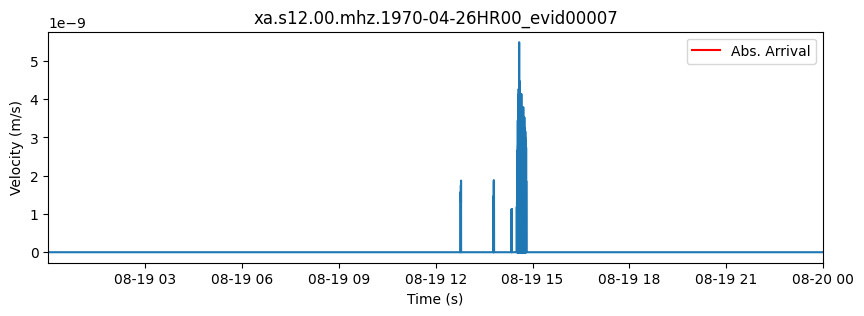

Longest sequence:  2814 from 453742 to 467510
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572413    0.0
572414    0.0
572415    0.0
572416    0.0
572417    0.0
Name: longest_consecutive_velocity(m/s), Length: 572418, dtype: float64


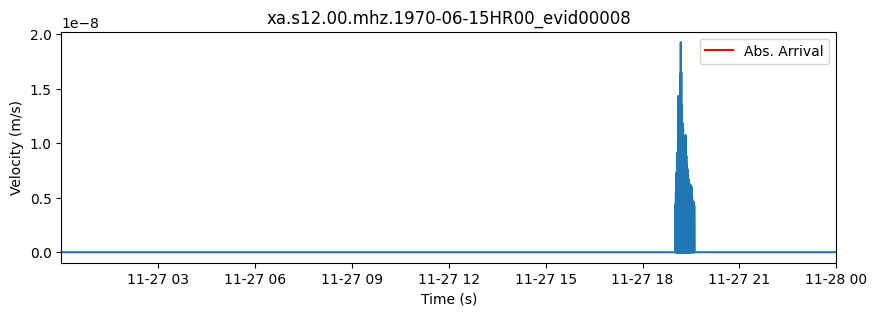

Longest sequence:  2990 from 478938 to 495158
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572418    0.0
572419    0.0
572420    0.0
572421    0.0
572422    0.0
Name: longest_consecutive_velocity(m/s), Length: 572423, dtype: float64


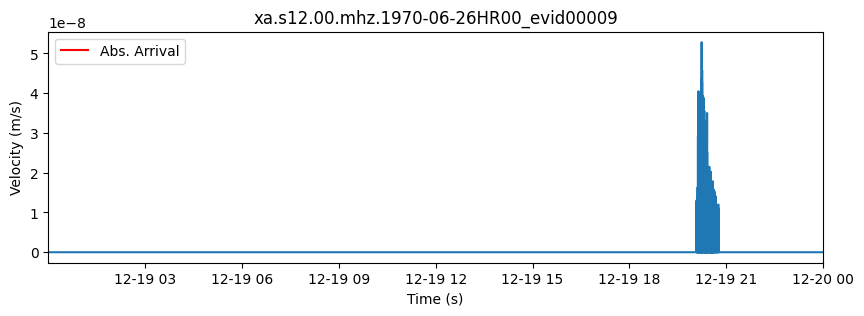

Longest sequence:  4305 from 122779 to 142460
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572406    0.0
572407    0.0
572408    0.0
572409    0.0
572410    0.0
Name: longest_consecutive_velocity(m/s), Length: 572411, dtype: float64


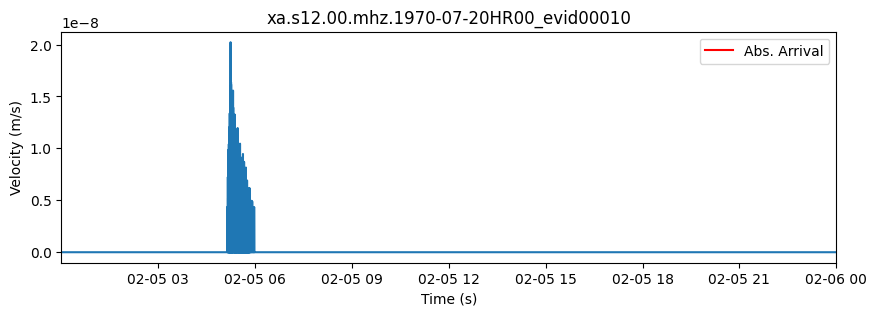

Longest sequence:  4305 from 122779 to 142460
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572406    0.0
572407    0.0
572408    0.0
572409    0.0
572410    0.0
Name: longest_consecutive_velocity(m/s), Length: 572411, dtype: float64


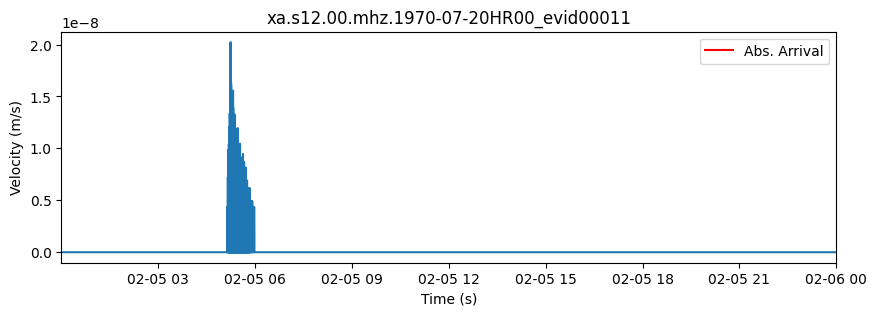

Longest sequence:  5288 from 476761 to 499344
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572418    0.0
572419    0.0
572420    0.0
572421    0.0
572422    0.0
Name: longest_consecutive_velocity(m/s), Length: 572423, dtype: float64


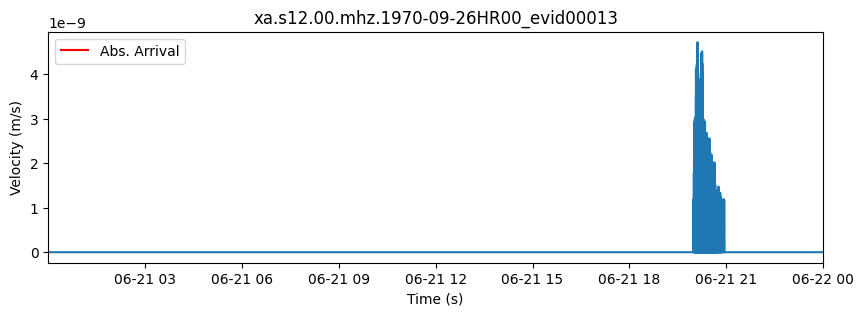

Longest sequence:  674 from 412225 to 422908
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572415    0.0
572416    0.0
572417    0.0
572418    0.0
572419    0.0
Name: longest_consecutive_velocity(m/s), Length: 572420, dtype: float64


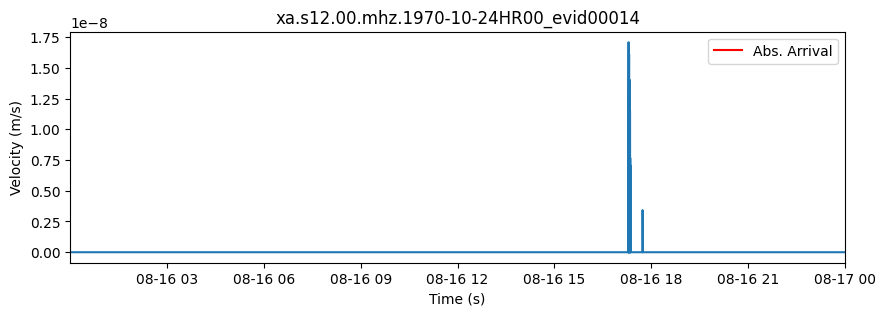

Longest sequence:  3357 from 307694 to 326823
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572406    0.0
572407    0.0
572408    0.0
572409    0.0
572410    0.0
Name: longest_consecutive_velocity(m/s), Length: 572411, dtype: float64


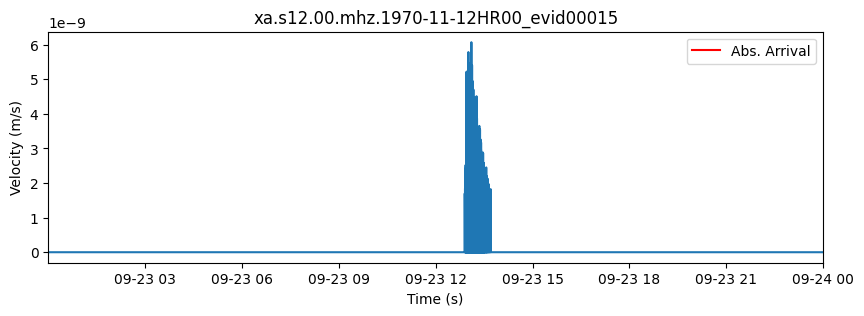

Longest sequence:  5851 from 177099 to 203246
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572410    0.0
572411    0.0
572412    0.0
572413    0.0
572414    0.0
Name: longest_consecutive_velocity(m/s), Length: 572415, dtype: float64


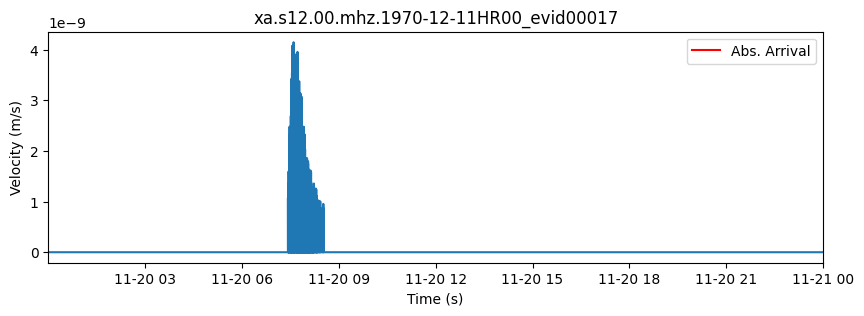

Longest sequence:  3307 from 490925 to 503588
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572418    0.0
572419    0.0
572420    0.0
572421    0.0
572422    0.0
Name: longest_consecutive_velocity(m/s), Length: 572423, dtype: float64


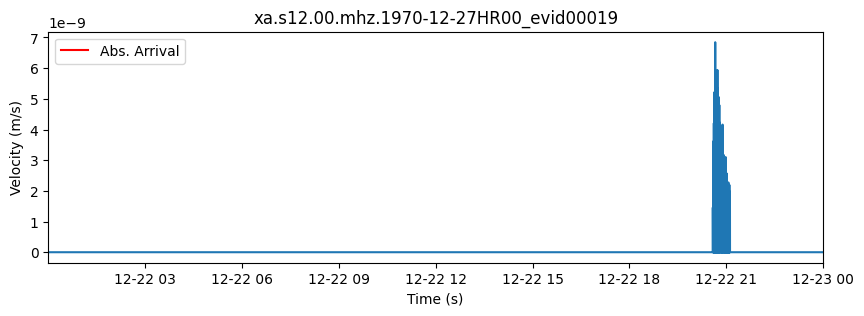

Longest sequence:  607 from 370309 to 381830
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572406    0.0
572407    0.0
572408    0.0
572409    0.0
572410    0.0
Name: longest_consecutive_velocity(m/s), Length: 572411, dtype: float64


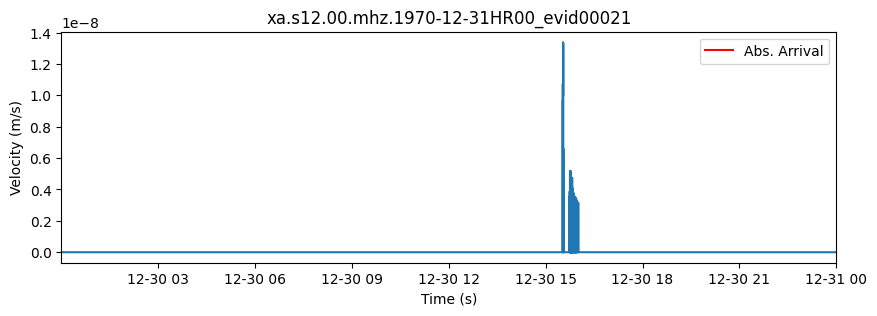

Longest sequence:  7738 from 303120 to 354270
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572406    0.0
572407    0.0
572408    0.0
572409    0.0
572410    0.0
Name: longest_consecutive_velocity(m/s), Length: 572411, dtype: float64


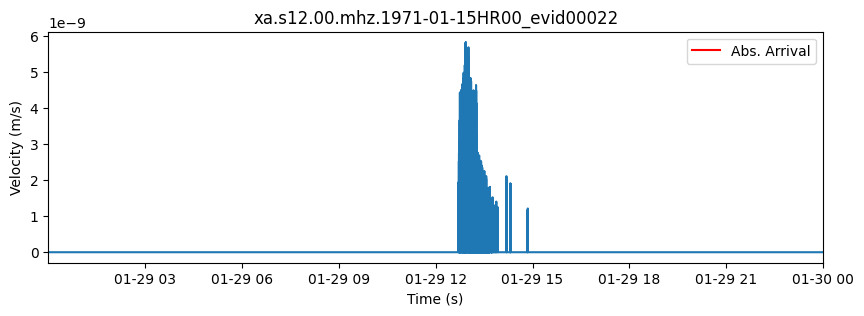

Longest sequence:  171 from 285407 to 285833
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572418    0.0
572419    0.0
572420    0.0
572421    0.0
572422    0.0
Name: longest_consecutive_velocity(m/s), Length: 572423, dtype: float64


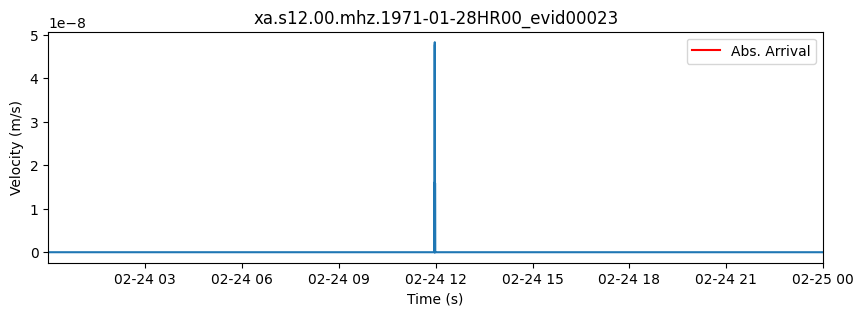

Longest sequence:  901 from 419901 to 451018
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572418    0.0
572419    0.0
572420    0.0
572421    0.0
572422    0.0
Name: longest_consecutive_velocity(m/s), Length: 572423, dtype: float64


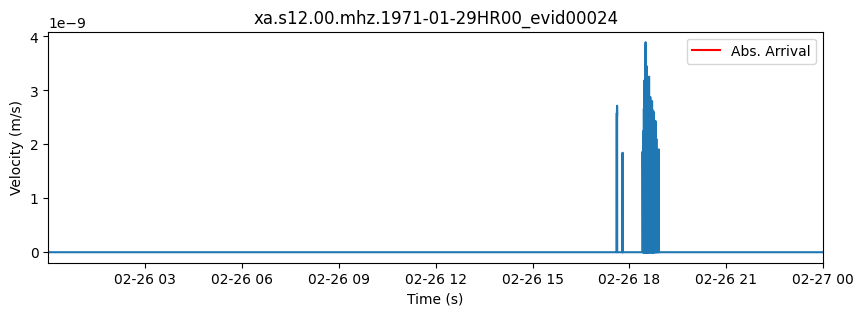

Longest sequence:  4978 from 56715 to 105133
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572406    0.0
572407    0.0
572408    0.0
572409    0.0
572410    0.0
Name: longest_consecutive_velocity(m/s), Length: 572411, dtype: float64


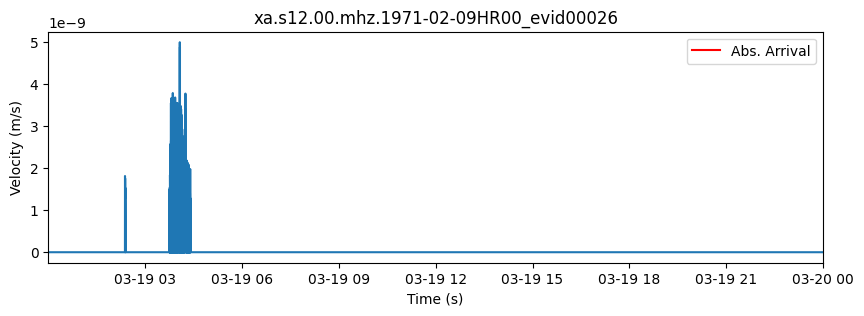

Longest sequence:  6736 from 351335 to 403196
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
572422    0.0
572423    0.0
572424    0.0
572425    0.0
572426    0.0
Name: longest_consecutive_velocity(m/s), Length: 572427, dtype: float64


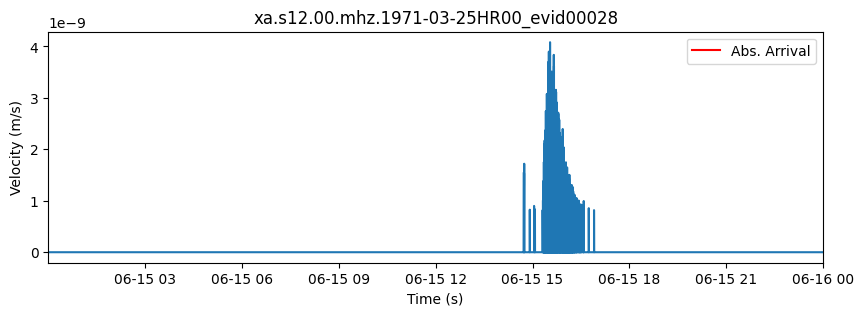

FileNotFoundError: [Errno 2] No such file or directory: './space_apps_2024_seismic_detection/data/lunar/training/data/S12_GradeA/xa.s12.00.mhz.1971-04-13HR00_evid00029.mseed'

In [5]:
#iterate through files in directory
for row in cat.iterrows():
    filename = row[1]['filename']
    arrival_time = datetime.strptime(row[1]['time_abs(%Y-%m-%dT%H:%M:%S.%f)'],'%Y-%m-%dT%H:%M:%S.%f')
    mseed_file = f'{data_directory}{filename}.mseed'
    st = read(mseed_file)
    filtered = filter(st)
    # print(filtered.head())

    tr_times = filtered['time_abs']
    # tr_data = filtered['filtered_velocity(m/s)']
    tr_data = filtered['longest_consecutive_velocity(m/s)']
    
    # Initialize figure
    fig,ax = plt.subplots(1,1,figsize=(10,3))
    # Make the plot pretty
    ax.set_ylabel('Velocity (m/s)')
    ax.set_xlabel('Time (s)')
    ax.set_xlim([min(tr_times),max(tr_times)])
    ax.set_title(f'{filename}')
    # Mark detection
    arrival_line = ax.axvline(x=arrival_time, c='red', label='Abs. Arrival')
    ax.legend(handles=[arrival_line])
    ax.plot(tr_times,tr_data)

    # df = tr.stats.sampling_rate

    # cft = classic_sta_lta(tr_data, int(sta_len * df), int(lta_len * df))

    # on_off = np.array(trigger_onset(cft, thr_on, thr_off))

    # for i in np.arange(0,len(on_off)):
    #     triggers = on_off[i]
    #     ax.axvline(x = tr_times[triggers[0]], color='red', label='Trig. On')
    #     ax.axvline(x = tr_times[triggers[1]], color='purple', label='Trig. Off')


    plt.show()